## Descriptive Statistics

 Import **NumPy**, **SciPy**, and **Pandas**

In [4]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

 Randomly generate 1,000 samples from the normal distribution using `np.random.normal()`(mean = 100, standard deviation = 15)

In [24]:
samples = np.random.normal(100,15,1000) # other way np.random.randn(1000)*15+100
samples

array([ 90.13401082,  86.68414829,  89.58229569, 123.07441417,
       106.63955025, 103.76446207,  91.43334786, 116.12116895,
       108.4295099 , 120.21027104, 109.06453686,  97.8709664 ,
       114.03470086,  84.86665443,  99.10185873,  77.07535339,
       111.04320124,  77.66610649, 108.84080672, 113.03660972,
        92.55438562,  78.5260721 ,  92.29306168,  86.02601712,
       106.35886586, 107.83042254, 102.85211204,  89.45991404,
        84.56829529, 100.31195848,  80.52079351, 104.87757442,
       113.45457888, 116.09678089, 104.17008023, 101.57624303,
       115.61672689,  95.22485826, 100.49058638,  83.24357766,
       100.31944937,  97.26703706,  86.48221051, 111.43213813,
        94.54309851,  99.99008223,  83.58359846, 104.12922133,
       104.24703569,  89.58638133,  79.81698007, 103.53050885,
       103.41043747, 108.47135373,  94.17022775,  92.07623223,
        81.83351888, 124.68428419,  75.56422162, 115.35965987,
       104.40964231, 103.63578741,  98.23322871, 118.91

Compute the **mean**, **median**, and **mode**

In [6]:
mean = np.mean(samples)
median =np.median(samples)
mode = stats.mode(samples)
print("mean:", mean,",\nmedian:", median, ",\nmode", mode)

mean: 99.98791042481238 ,
median: 100.04522632662662 ,
mode ModeResult(mode=array([50.71218923]), count=array([1]))


Compute the **min**, **max**, **Q1**, **Q3**, and **interquartile range**

In [7]:
min = samples.min()
max = samples.max()
q1 = np.percentile(samples, 25)
q3 = np.percentile(samples, 75)
iqr = q3 - q1
print("min:", min,", \nmax:", max,",","\nq1:", q1,", \nq3:",q3,", \niqr:",iqr)

min: 50.71218922846619 , 
max: 146.62017467599384 , 
q1: 90.37776747226522 , 
q3: 109.97314543001289 , 
iqr: 19.595377957747672


Compute the **variance** and **standard deviation**

In [8]:
variance = np.var(samples)
std_dev =  np.std(samples)

print("std: ", std_dev, "\n\nvariance: ", variance)

std:  14.689929688303158 

variance:  215.7940342472905


Compute the **skewness** and **kurtosis**

In [9]:
skewness = stats.skew(samples)
kurtosis = stats.kurtosis(samples)
print("skewness: ", skewness, ",\n\nkurtosis: ", kurtosis)

skewness:  -0.08430011201152857 ,

kurtosis:  0.1616524415293954


## NumPy Correlation Calculation

Create an array x of integers between 10 (inclusive) and 20 (exclusive). Use `np.arange()`

In [10]:
x = np.arange(10,20)
x

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

Then use `np.array()` to create a second array y containing 10 arbitrary integers.

In [26]:
y =  np.random.randint(1,100,10)
y

array([12,  6,  2, 94, 88, 28,  5, 28, 52, 21])

Once you have two arrays of the same length, you can compute the **correlation coefficient** between x and y

In [12]:
r = np.corrcoef(x, y)
r

array([[ 1.        , -0.24767742],
       [-0.24767742,  1.        ]])

## Pandas Correlation Calculation

Run the code below

In [13]:
x = pd.Series(range(10, 20))
y = pd.Series([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
df = pd.DataFrame(list(zip(x, y)), columns=['x', 'y'])
df

,x,y
0,10,2
1,11,1
2,12,4
3,13,5
4,14,8
5,15,12
6,16,18
7,17,25
8,18,96
9,19,48


Call the relevant method  to calculate Pearson's r correlation.

In [14]:
r = stats.pearsonr(x,y)
r

(0.758640289091187, 0.010964341301680813)

In [15]:
r1 = x.corr(y)
r1

0.7586402890911867

OPTIONAL. Call the relevant method to calculate Spearman's rho correlation.

In [16]:
rho, p = stats.spearmanr(x, y)
print('Spearmans correlation coefficient: %.6f' % rho)

Spearmans correlation coefficient: 0.975758


## Seaborn Dataset Tips

Import Seaborn Library

In [17]:
import seaborn as sns

Load "tips" dataset from Seaborn

In [18]:
tips = sns.load_dataset("tips")

Generate descriptive statistics include those that summarize the central tendency, dispersion

In [28]:
tips.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


Call the relevant method to calculate pairwise Pearson's r correlation of columns

In [20]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


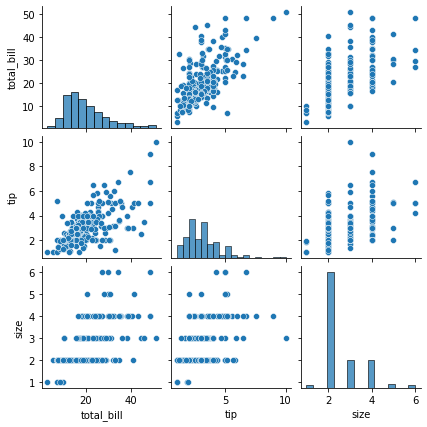

In [29]:
sns.pairplot(tips, height = 2)
plt.show();

(5.0, 0.0)

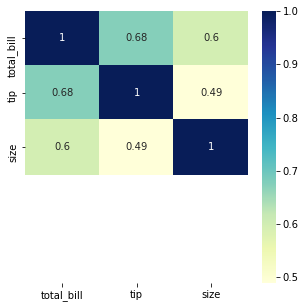

In [30]:
plt.figure(figsize=(5,5))
sns.heatmap(tips.corr(),annot=True, cmap='YlGnBu')
plt.ylim(5, 0)  